Clasificación de Patrones de Comportamiento en Datos de Salud
Utilizaremos el conjunto de datos "Heart Disease" del repositorio UCI Machine Learning Repository, disponible en Heart Disease Dataset.

1. Configuración Inicial
Abre Google Colab.
Crea un nuevo cuaderno (notebook).
Instala las bibliotecas necesarias.


In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

2. Carga y Exploración de Datos
Carga el conjunto de datos.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=column_names)

# Reemplazar los valores de '?' por NaN
df.replace('?', np.nan, inplace=True)

# Convertir las columnas a tipo numérico
df = df.apply(pd.to_numeric)

# Mostrar las primeras filas del DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


3. Preprocesamiento de Datos
Manejar los valores faltantes y escalar las características.

In [ ]:
# Manejar valores faltantes
df.dropna(inplace=True)
# Separar las características (X) y la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Entrenamiento del Modelo
Dividir el conjunto de datos en entrenamiento y prueba.
Entrenar el modelo de clasificación.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Seleccionar y entrenar el modelo de clasificación
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

5. Evaluación del Modelo
Evaluar el modelo utilizando las métricas de evaluación.

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6166666666666667
Confusion Matrix:
[[34  1  0  1  0]
 [ 5  1  0  2  1]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 1  1  0  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.17      0.11      0.13         9
           2       0.50      0.20      0.29         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60



6. Visualización de Resultados
Visualizar la matriz de confusión.

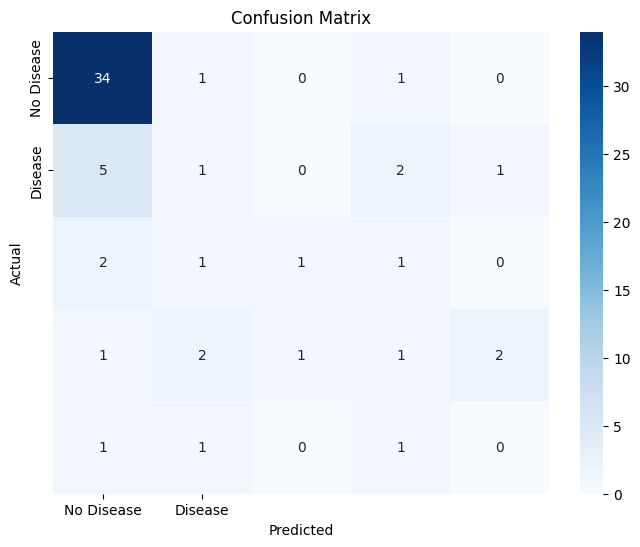

In [ ]:
# Visualizar la matriz de confusión

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

Explicación
Carga y Exploración de Datos:
Cargamos el conjunto de datos de "Heart Disease" y lo visualizamos.
Reemplazamos los valores faltantes y convertimos las columnas a tipo numérico.
Preprocesamiento de Datos:
Manejar los valores faltantes eliminando las filas incompletas.
Escalar las características para mejorar el rendimiento del modelo.
Entrenamiento del Modelo:
Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba.
Entrenamos un modelo de regresión logística.
Evaluación del Modelo:
Realizamos predicciones y evaluamos el rendimiento del modelo utilizando métricas como la precisión, matriz de confusión y el informe de clasificación.
Visualización de Resultados:
Visualizamos la matriz de confusión para comprender mejor el rendimiento del modelo.
